# 配置基础环境

In [ ]:
import akshare as ak
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'STKAITI'
plt.rcParams['axes.unicode_minus'] = False
# 关闭警告信息
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 获取上证指数数据
index_code = 'sh000001'
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2023-12-31')
price_df = ak.stock_zh_index_daily(symbol=index_code)
price_df['date'] = pd.to_datetime(price_df['date'])
price_df = price_df[(price_df['date'] >= start_date) & (price_df['date'] <= end_date)]
price_df = price_df.sort_values('date').set_index('date')

In [7]:
# 计算每日收益率
price_df['returns'] = price_df['close'].pct_change().shift(-1).fillna(0)
price_df

,open,high,low,close,volume,returns
date,,,,,,
2014-01-02,2112.126,2113.110,2101.016,2109.387,6848548800,-0.012445
2014-01-03,2101.542,2102.167,2075.899,2083.136,8449724000,-0.017967
2014-01-06,2078.684,2078.684,2034.006,2045.709,8958760800,0.000786
2014-01-07,2034.224,2052.279,2029.246,2047.317,6340293600,-0.001454
2014-01-08,2047.256,2062.952,2037.110,2044.340,7164736000,-0.008178
...,...,...,...,...,...,...
2023-12-25,2909.875,2920.632,2903.987,2918.813,22981417800,-0.006829
2023-12-26,2917.971,2917.971,2892.837,2898.879,22814085500,0.005428
2023-12-27,2900.149,2917.956,2890.165,2914.614,24790088200,0.013755


# 单均线择时策略

In [36]:
# 计算移动平均线
days = 20
price_df[f'ma_{days}'] = ta.sma(price_df['close'], length=days)
price_df

,open,high,low,close,volume,returns,ma_20,ma_s,ma_l
date,,,,,,,,,
2014-01-02,2112.126,2113.110,2101.016,2109.387,6848548800,-0.012445,NaN,NaN,NaN
2014-01-03,2101.542,2102.167,2075.899,2083.136,8449724000,-0.017967,NaN,NaN,NaN
2014-01-06,2078.684,2078.684,2034.006,2045.709,8958760800,0.000786,NaN,NaN,NaN
2014-01-07,2034.224,2052.279,2029.246,2047.317,6340293600,-0.001454,NaN,NaN,NaN
2014-01-08,2047.256,2062.952,2037.110,2044.340,7164736000,-0.008178,NaN,2065.9778,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-25,2909.875,2920.632,2903.987,2918.813,22981417800,-0.006829,2970.21240,2917.3608,3022.204417
2023-12-26,2917.971,2917.971,2892.837,2898.879,22814085500,0.005428,2963.22860,2910.6584,3018.592283
2023-12-27,2900.149,2917.956,2890.165,2914.614,24790088200,0.013755,2957.87495,2913.1592,3015.464633


In [37]:
# 计算择时信号
timing_df = (price_df[[f'ma_{days}']].diff() > 0) * 1.
timing_df['不择时'] = 1.
timing_df

,ma_20,不择时
date,,
2014-01-02,0.0,1.0
2014-01-03,0.0,1.0
2014-01-06,0.0,1.0
2014-01-07,0.0,1.0
2014-01-08,0.0,1.0
...,...,...
2023-12-25,0.0,1.0
2023-12-26,0.0,1.0
2023-12-27,0.0,1.0


In [38]:
# 计算每日收益率
timing_ret = timing_df.mul(price_df['returns'], axis=0)
timing_ret['超额收益'] = (1 + timing_ret[f'ma_{days}']).div(1 + timing_ret['不择时'], axis=0) - 1.
timing_ret

,ma_20,不择时,超额收益
date,,,
2014-01-02,-0.0,-0.012445,0.012602
2014-01-03,-0.0,-0.017967,0.018295
2014-01-06,0.0,0.000786,-0.000785
2014-01-07,-0.0,-0.001454,0.001456
2014-01-08,-0.0,-0.008178,0.008245
...,...,...,...
2023-12-25,-0.0,-0.006829,0.006876
2023-12-26,0.0,0.005428,-0.005399
2023-12-27,0.0,0.013755,-0.013568


In [39]:
# 计算累计收益率
cumul_ret = (1 + timing_ret.fillna(0)).cumprod() - 1.
cumul_ret

,ma_20,不择时,超额收益
date,,,
2014-01-02,0.000000,-0.012445,0.012602
2014-01-03,0.000000,-0.030188,0.031128
2014-01-06,0.000000,-0.029426,0.030318
2014-01-07,0.000000,-0.030837,0.031818
2014-01-08,0.000000,-0.038762,0.040326
...,...,...,...
2023-12-25,1.100256,0.374276,0.528264
2023-12-26,1.100256,0.381735,0.520013
2023-12-27,1.100256,0.400741,0.499390


<Axes: title={'center': '单均线择时'}, xlabel='date'>

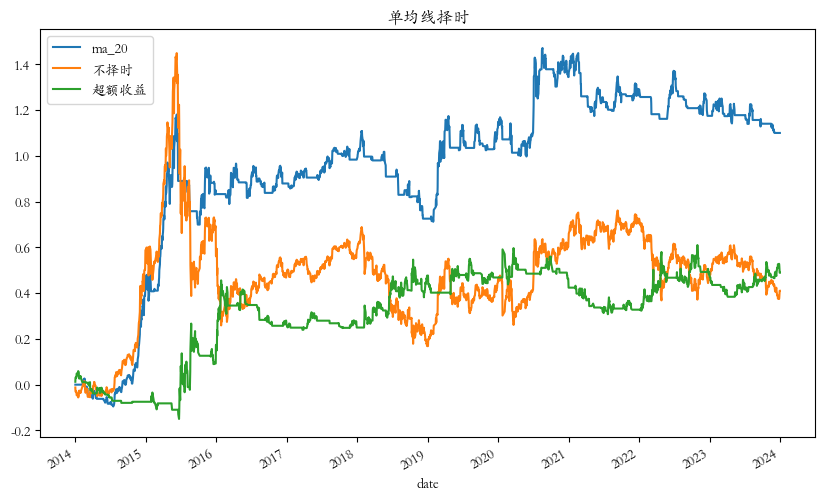

In [40]:
# 可视化输出
cumul_ret.plot(figsize=(10, 6), title='单均线择时')

# 双均线择时策略

In [65]:
days_s = 5
days_l = 60
price_df['ma_s'] = ta.sma(price_df['close'], length=days_s)
price_df['ma_l'] = ta.sma(price_df['close'], length=days_l)

In [66]:
timing_df = pd.DataFrame()
timing_df['择时'] = (price_df['ma_s'] > price_df['ma_l']) * 1.
timing_df['不择时'] = 1.

In [67]:
timing_ret = timing_df.mul(price_df['returns'], axis=0)
timing_ret['超额收益'] = (1 + timing_ret['择时']).div(1 + timing_ret['不择时'], axis=0) - 1.
cumul_ret = (1 + timing_ret.fillna(0)).cumprod() - 1.
cumul_ret

,择时,不择时,超额收益
date,,,
2014-01-02,0.000000,-0.012445,0.012602
2014-01-03,0.000000,-0.030188,0.031128
2014-01-06,0.000000,-0.029426,0.030318
2014-01-07,0.000000,-0.030837,0.031818
2014-01-08,0.000000,-0.038762,0.040326
...,...,...,...
2023-12-25,0.249638,0.374276,-0.090694
2023-12-26,0.249638,0.381735,-0.095603
2023-12-27,0.249638,0.400741,-0.107874


<Axes: title={'center': '双均线择时'}, xlabel='date'>

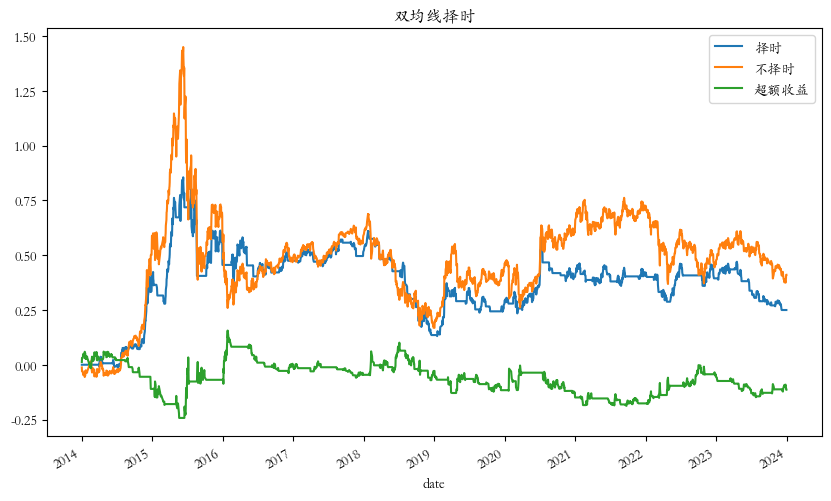

In [68]:
# 可视化输出
cumul_ret.plot(figsize=(10, 6), title='双均线择时')